# Trabajo Practico 2 - Matrices de Insumo Producto

## Enunciado

### Consigna 1 -

Queremos demostrar que si se cumple la siguiente igualdad:

$$
(\mathbf{I - A})^{-1} = \mathbf{I} + \mathbf{A} + \mathbf{A^{2}} + \ldots + \mathbf{A^{n}} + \ldots
$$

Entonces vale que:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = 0
$$

Definimos:

$$
S_n = \mathbf{I} + \mathbf{A} + \mathbf{A^2} + \ldots + \mathbf{A^n}
$$

Multiplicando a izquierda a ambos lados por $(\mathbf{I - A})$, tenemos:

$$
(\mathbf{I - A}) S_n = (\mathbf{I - A}) \left(\mathbf{I} + \mathbf{A} + \mathbf{A^2} + \ldots + \mathbf{A^n}\right)
$$

De aquí obtenemos:

$$
(\mathbf{I - A}) S_n = \mathbf{I} - \mathbf{A^{n+1}}
$$

Por lo tanto, podemos expresar:

$$
\mathbf{A^{n+1}} = \mathbf{I} - (\mathbf{I - A}) S_n
$$

Ahora calculemos $\lim_{n \to \infty} \mathbf{A}^{n+1}$

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \lim_{n \to \infty} \mathbf{I} - (\mathbf{I - A}) S_n 
$$

Por álgebra de límites:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \lim_{n \to \infty} \mathbf{I} - (\lim_{n \to \infty}(\mathbf{I - A}) . \lim_{n \to \infty} S_n) 
$$

Como suponemos que $(\mathbf{I - A})^{-1} = \lim_{n \to \infty} S_n$, llegamos a:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \mathbf{I} - (\mathbf{I - A} . \mathbf{I - A})^{-1}) = 0
$$



### Consigna 2 -


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from funcionesTP1 import *

(np.float64(3.9999941157219006), array([[0.83205356],
       [0.5546953 ]]))


In [2]:
#Definimos las matrices:

data1 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
    ]

A1 = np.array(data1)

data2 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
    ]

A2 = np.array(data2)

In [3]:
#Definimos función para calcular los vectores:

def vector_generator(A, n):
    v = np.zeros(n)
    
    for i in range (n):
        A_elev = elevar_matriz(A, i+1 )
        v[i] = np.linalg.norm(A_elev, 2)
    
    return v

def elevar_matriz (A, n):
    res = np.eye(np.shape(A)[0])

    for i in range (n):
        res = res @ A

    return res 

In [4]:
#Generamos los vectores pedidos:
a1 = vector_generator(A1,250)

a2 = vector_generator(A2, 250)

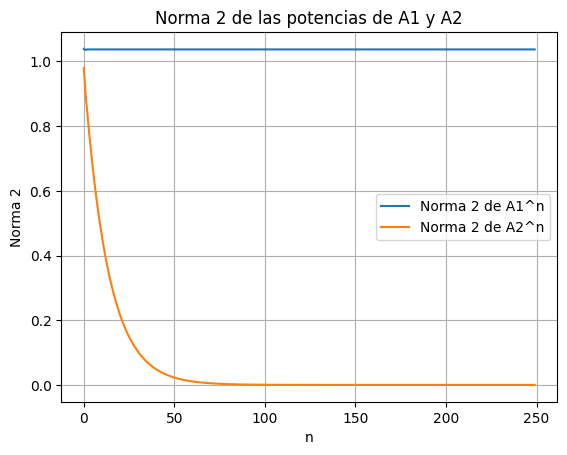

In [5]:
#Grafico:

plt.figure()
plt.plot(a1, label='Norma 2 de A1^n')
plt.plot(a2, label='Norma 2 de A2^n')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

### Consigna 3 -

In [6]:
#Primero definimos una función que realice el método de la potencia aplicando el método de Monte Carlo.

def metodo_potencia_MonteC(A,n):
    autovals_arr = np.zeros(n)

    for i in range (n):
        autovals_arr[i], _ = metodo_potencia(A)

    media = np.mean(autovals_arr)
    desvio_estandar = np.std(autovals_arr)

    return media, desvio_estandar


In [7]:
#Calculo Autovalores de A1 y A2

#A1:
a1, ds1 = metodo_potencia_MonteC(A1,250)
print(f'autovalor más grande de A1 :{a1}')


#A2
a2, ds2 = metodo_potencia_MonteC(A2,250)
print(f'autovalor más grande de A12 :{a2}')

#chequeo
#np.linalg.eigvals(A1)
#np.linalg.eigvals(A2)

autovalor más grande de A1 :1.000000145888452
autovalor más grande de A12 :0.9276516933461482


### Consigna 4 -


In [8]:
#Utilizamos nuevamente las matrices del ejercicio 2:

data1 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
    ]

A1 = np.array(data1)

data2 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
    ]

A2 = np.array(data2)



La ecuacion (4) es : (I − A)^−1 = I + A + A^2 + A^3 + . . . + A^n + . . . (despues lo escribo bien con latex)

In [9]:
#para n = 10
n10 = 10

def serie_de_potencias(A,n): #tal vez ineficiente, pero no me importa juaaaaaaa
    dim=np.shape(A)[0]
    
    v = np.zeros(n)
    e=np.zeros(n)

    L,U,P= calcularLU(np.eye(dim)-A)

    ImenosA_inversa=inversaLU(L, U, P)


    for i in range(n):
        serie= suma_potencias(A,i)
        v[i]=np.linalg.norm(serie, 2)
        e[i]=np.linalg.norm(serie-ImenosA_inversa,2)
    

    return v, e

    
    
def suma_potencias(A,n):
    dim=np.shape(A)[0]
    
    v = np.zeros(n+1)
    I = np.eye(dim)

    if n!=0:
        return elevar_matriz(A,n) + suma_potencias(A,n-1)
    else:
        return I


vA1,errorvA1=serie_de_potencias(A1,n10)

vA2,errorvA2=serie_de_potencias(A2,n10)

vA1_100,errorvA1_100=serie_de_potencias(A1,100)

vA2_100,errorvA2_100=serie_de_potencias(A2,100)

#print(errorvA2_100)



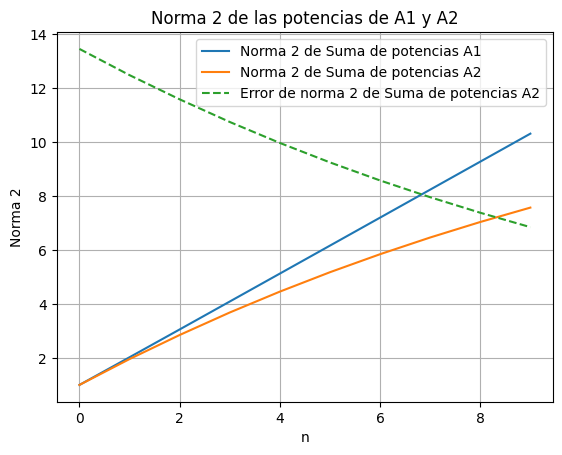

In [10]:
#Grafico para n=10:

plt.figure()
plt.plot(vA1, label='Norma 2 de Suma de potencias A1')
plt.plot(vA2, label='Norma 2 de Suma de potencias A2')
plt.plot(errorvA2, label='Error de norma 2 de Suma de potencias A2',linestyle="--")
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

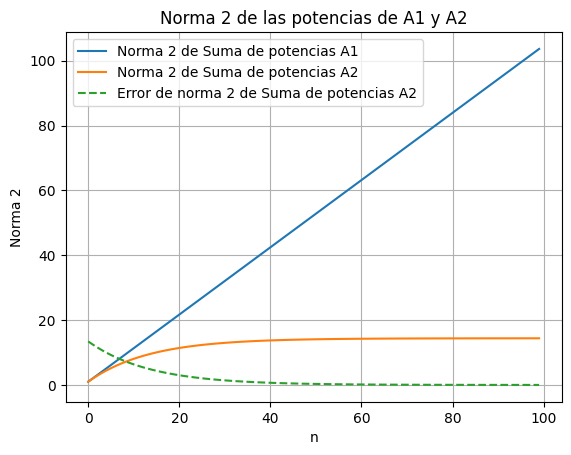

In [11]:
#Grafico para n=100:

plt.figure()
plt.plot(vA1_100, label='Norma 2 de Suma de potencias A1')
plt.plot(vA2_100, label='Norma 2 de Suma de potencias A2')
plt.plot(errorvA2_100, label='Error de norma 2 de Suma de potencias A2',linestyle="--")
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

(b) Podemos obvservar que, mientras que A2 luce converger alrededor del 17, la serie de potencias de A1 diverge. Aumentar el n solo hace que aumente la norma. (c) Con los datos que tenemos, pareciese que la convergencia de la serie de potencias esta relacionado con que la matriz elevada a la n (su norma) tienda a 0 cuando n tiende a infiinito.


###     Consigna 5 -

In [12]:

import pandas as pd

nombreFile = "matrizlatina2011_compressed_0.xlsx"
archivo = pd.read_excel(nombreFile, sheet_name=1)

p1="SLV"
p2="PAN"

panama = archivo[archivo["Country_iso3"]==p2] #seleccionamos las filas de Panamá

iPP= panama.filter(regex='^PAN', axis=1) #seleccionamos las columas de Panamá

outputP=panama["Output"] #Output es el total producido

output01P= outputP.replace(0,1) #Cambiamos los 0s por los 1s en el vector de produccion total, para luego poder calcular A con la fórmula dada en la 
                                #seccion de coeficientes técnicos. ( A = ZP^-1).

salvador = archivo[archivo["Country_iso3"]==p1] #seleccionamos las filas de El Salvador


iSS= salvador.filter(regex='^SLV', axis=1) #seleccionamos las columas de El Salvador

outputS = salvador["Output"] #Output es el total producido

output01S=outputS.replace(0,1) #Cambiamos los 0s por los 1s en el vector de produccion total, para luego poder calcular A con la fórmula dada en la 
                                #seccion de coeficientes técnicos. ( A = ZP^-1).
def coeficientesTecnicos(Z,P):
    """Recibe la matriz de flujo de capitales y en vector produccion. Devuelve la matriz de coeficientes tecnicos asociada"""
    P= np.diag(P)
    L, U, Per = calcularLU(P)
    P_inv = inversaLU(L, U, Per)
    A =Z@P_inv
    
    return  A

APP = coeficientesTecnicos(iPP, output01P)

ASS= coeficientesTecnicos(iSS, output01S) 



#### Cálculo autovalores de APP y ASS.

In [13]:
#APP:

APP_arr = APP.to_numpy()

a_PP,ds= metodo_potencia_MonteC(APP_arr,250)

print(f'Mayor autovalor de APP: {a_PP}')

#ASS

ASS_arr = ASS.to_numpy()

a_SS,ds= metodo_potencia_MonteC(ASS_arr,250)

print(f'Mayor autovalor de ASS: {a_SS}')

#chequeo
#np.linalg.eigvals(APP)
#np.linalg.eigvals(ASS)

Mayor autovalor de APP: 0.2826562862752269
Mayor autovalor de ASS: 0.26326699984360313


#### Calculamos vectores con la norma de la matriz elevada a i en la posición i y lo graficamos

In [14]:
a1 = vector_generator(APP_arr,250)

a2 = vector_generator(ASS_arr, 250)

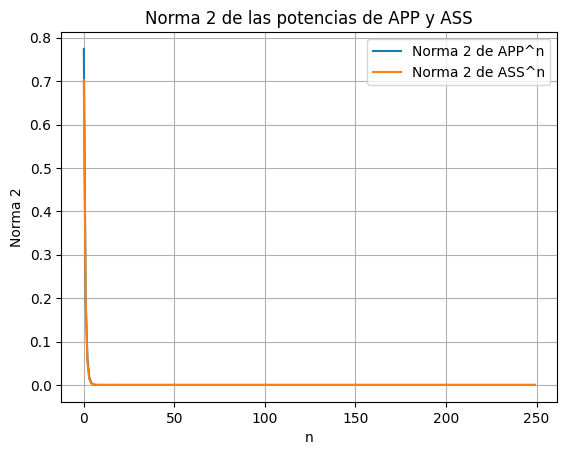

In [15]:
#Grafico de Normas.
plt.figure()
plt.plot(a1, label='Norma 2 de APP^n')
plt.plot(a2, label='Norma 2 de ASS^n')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de APP y ASS')
plt.legend()
plt.grid()
plt.show()

Se puede observar que las las normas de las matrices elevadas tienden a 0 a medida que aumenta el n. Por lo tanto,
según el argumento dado en el Punto 4, la serie de potencias convergerá.

#### Ahora calculamos y graficamos la serie de potencias.

In [16]:
#Primero calculamos los vectores con la serie de potencia hasta n en cada coordenada.

vAPP_100,errorvAPP_100=serie_de_potencias(APP_arr,100)

vASS_100,errorvASS_100=serie_de_potencias(ASS_arr,100)

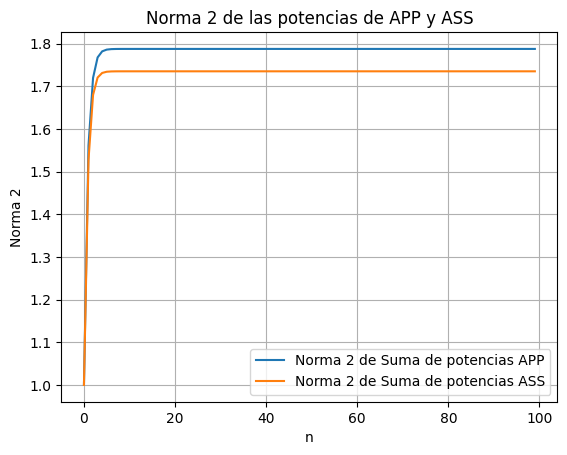

In [17]:
#Grafico:

plt.figure()
plt.plot(vAPP_100, label='Norma 2 de Suma de potencias APP')
plt.plot(vASS_100, label='Norma 2 de Suma de potencias ASS')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de APP y ASS')
plt.legend()
plt.grid()
plt.show()

Se puede observar en el gráfico que la suma de potencias converge.

### Consigan 6 -

$$
E_{n} = \begin{bmatrix}
1 - \frac{1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & 1-\frac{1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & 1-\frac{1}{n}
\end{bmatrix} \in \mathbb{R}^{n \times n}
$$

$\underline{\text{Ítem a:}}$

$\underline{\text{Ítem b:}}$


Notamos que:

 $\lambda$=1 es un autovalor, pues:
$$
E_{n}-I = \begin{bmatrix}
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n}
\end{bmatrix}
$$

Tomamos $\{d_2, \ldots, d_n\} \text{ una base de } \langle e \rangle^{\perp}.$


Tal que $$d_{i}=\begin{bmatrix}
                 -1\\
                 0\\
                 \vdots\\
                 1\\
                 0\\
                 \vdots\\
                 0\\
                 \end{bmatrix}
                 \quad 
                 \longrightarrow{ posición \, i }
        $$, para $2 \leq i \leq n$

Luego, para cada $i$
$$(E_{n}-I)d_{i}= 
\begin{bmatrix}
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n}
\end{bmatrix} 
 \begin{bmatrix}
-1\\
0\\
\vdots\\
1\\
0\\
\vdots\\
0\\
\end{bmatrix} = 
\begin{bmatrix}
\frac{1}{n}-\frac{1}{n}\\
\frac{1}{n}-\frac{1}{n}\\
\vdots\\
\frac{1}{n}-\frac{1}{n}\\
                 
\end{bmatrix}= 
\begin{bmatrix}
0\\
0\\
\vdots\\
0\\
                 
\end{bmatrix}
                 
                 
                 
$$

$\Rightarrow  E_{\lambda=1}= \langle d_2, \ldots, d_n \rangle$, espacio de dimensión $n-1$


$\lambda$=0, pues 
$$E_{n} 
\begin{bmatrix}
1\\
1\\
\vdots\\
1\\
                 
\end{bmatrix}=
\begin{bmatrix}
1-\frac{1}{n}*\sum_{i=1}^{n} 1\\
1-\frac{1}{n}*\sum_{i=1}^{n} 1\\
\vdots\\
1-\frac{1}{n}*\sum_{i=1}^{n} 1\\
                 
\end{bmatrix}=
\begin{bmatrix}
0\\
0\\
\vdots\\
0\\
                 
\end{bmatrix}
$$

$\Rightarrow  E_{\lambda=0}= \langle (1,1,...,1) \rangle$, espacio de dimensión 1

$\therefore$ Tenemos una base de autovectores de $\mathbb{R}^n$ : B = $\{e,d_2, \ldots, d_n\}$, con e asociado a $\lambda$=0 y $d_{2},...,d_{n}$ asociado a $\lambda$=1





        


### Consigna 7 -

#### Primero normalizamos la matriz ASS y calculamos la matriz de covarianzas.

In [18]:
#Funcion para generar E_n:

def En_generator(n):
    E_n = np.eye(n) - np.ones((n, n)) * (1/n) 

    return E_n

E40 = En_generator(40)

In [19]:
#Normalizamos y calculamos cov.

ASSnorm = E40 @ ASS_arr

C = ASSnorm.T @ ASSnorm /(40-1)

#### Calculamos los dos primeros autovectores utilizando el Algoritmo de Hotelling.

In [20]:
def Hotelling (A, e):
    a1, v1 = metodo_potencia(A, e)

    A_prima = A - a1 * (v1 @ v1.T)
    a2, v2 = metodo_potencia(A_prima, e)

    return a1, v1, a2, v2

#### Ahora utilizamos la función Hotelling en C.

In [21]:
lambda1, v1, lambda2, v2 = Hotelling(C, 0.0001)

print(f'Mayor autovalor de C: {lambda1}')
print(f'Autovector asociado al mayor autovalor de C: {v1}')
print(f'Segundo mayor autovalor de C: {lambda2}')
print(f'Autovector asociado al segundo mayor autovalor de C: {v2}')

#Chequeo:
print(np.linalg.eigvals(C))
#print(np.linalg.eigvals(C - lambda1 * (v1 @ v1.T)))

Mayor autovalor de C: 0.010395205445932735
Autovector asociado al mayor autovalor de C: [[0.06721687]
 [0.06227586]
 [0.        ]
 [0.21534671]
 [0.18080901]
 [0.15114363]
 [0.21480451]
 [0.24680043]
 [0.2148858 ]
 [0.        ]
 [0.12054615]
 [0.11553103]
 [0.27152403]
 [0.09578452]
 [0.19412028]
 [0.38637512]
 [0.23177736]
 [0.18239933]
 [0.30660507]
 [0.16203876]
 [0.12301282]
 [0.09098654]
 [0.08215685]
 [0.07781948]
 [0.09097978]
 [0.        ]
 [0.09760229]
 [0.        ]
 [0.06274871]
 [0.04776673]
 [0.0926188 ]
 [0.09741707]
 [0.09185128]
 [0.08348532]
 [0.02954338]
 [0.23547937]
 [0.18023665]
 [0.12183819]
 [0.06873217]
 [0.17138888]]
Segundo mayor autovalor de C: 0.0030120160729276715
Autovector asociado al segundo mayor autovalor de C: [[ 0.13114881]
 [-0.02719646]
 [ 0.        ]
 [-0.08298742]
 [ 0.52909152]
 [ 0.33292897]
 [ 0.53592532]
 [ 0.21870327]
 [-0.05553301]
 [ 0.        ]
 [ 0.03018102]
 [-0.04342528]
 [-0.07068225]
 [ 0.27315517]
 [-0.13860238]
 [-0.13954743]
 [-0.1

In [22]:
# nose como mostrar los vectores de una forma que quede lindo
#despues te explico crack ~ Giannis

### Consigna 8 -

[[ 0.15635712  0.32552473  0.         ...  0.          0.
   0.        ]
 [ 0.00668869  0.01918734  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.11009061 -0.00172308  0.         ...  0.          0.
   0.        ]
 [ 0.28980504 -0.04036604  0.         ...  0.          0.
   0.        ]
 [ 0.56284503 -0.03407281  0.         ...  0.          0.
   0.        ]]


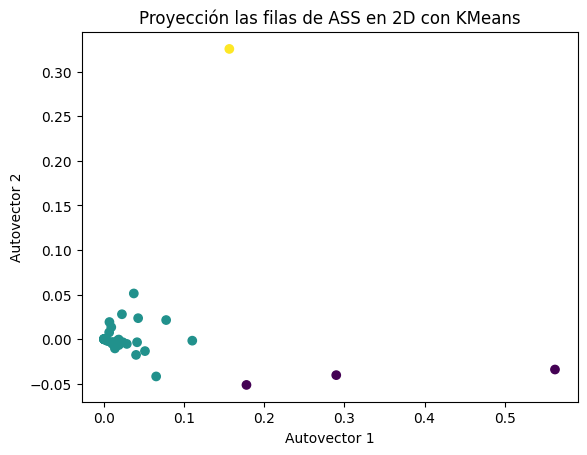

In [24]:
from sklearn.cluster import KMeans

#usamos los autovectores calculados en el punto anterior
autovector1 = v1
autovector2 = v2

# los convertimos en una matriz de 2x40
matriz2cols = np.column_stack((autovector1, autovector2))

ceros =np.zeros((40,38))
#llamo V a la matriz que tiene como primeras columas a los autovectores y el resto 0
V = np.column_stack((matriz2cols, ceros))
# proyectamos ASS
proyeccion = ASS_arr @ V
print (proyeccion)

# Aplicamos KMeans para agrupar los datos en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=4)
clusters = kmeans.fit_predict(proyeccion)

# Graficamos los resultados
scatter = plt.scatter(proyeccion[:, 0], proyeccion[:, 1], c=clusters)
plt.title("Proyección las filas de ASS en 2D con KMeans")
plt.xlabel("Autovector 1")
plt.ylabel("Autovector 2")
plt.show()

### CONSIGNA 10

In [25]:
#repetimos el analisis del punto 8)

#Primero vamos a tener que encontrar los autovectores de H. 

#Para ello, primero necesitamos H

def H_generator(A):
    I=np.eye(40)
    L,U,P = calcularLU(I-A)

    serie= inversaLU(L,U,P)



    H = serie - I

    return H

H=H_generator(ASS_arr)
print(H)
print(H.shape)

print(np.linalg.eigvals(H))


[[6.25378836e-02 4.51133415e-04 0.00000000e+00 ... 8.72209764e-04
  7.48312354e-04 9.82813404e-03]
 [1.21830415e-04 1.36216302e-04 0.00000000e+00 ... 6.78498666e-05
  3.49770366e-05 1.03569669e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.06736085e-02 1.33455961e-02 0.00000000e+00 ... 1.23385335e-01
  7.55722344e-02 2.61952208e-02]
 [1.57687504e-02 2.18737554e-02 0.00000000e+00 ... 7.54902107e-02
  5.34954191e-02 9.37032026e-02]
 [5.55774957e-02 4.75948703e-02 0.00000000e+00 ... 7.24401946e-02
  3.68818802e-02 1.09044987e-01]]
(40, 40)
[ 3.57353949e-01+0.j          2.22670668e-01+0.j
  1.79949574e-01+0.j          1.42548363e-01+0.01044303j
  1.42548363e-01-0.01044303j  1.25067211e-01+0.j
  1.05328590e-01+0.j         -2.43922282e-02+0.06264038j
 -2.43922282e-02-0.06264038j  8.56273277e-02+0.j
  3.61299791e-02+0.05774954j  3.61299791e-02-0.05774954j
  5.48878187e-02+0.j          5.39477898e-02+0.j
 -1.89327532e-02+0.02779

In [26]:




#Buscamos los autovectores de H

Hnorm = E40 @ H

lambda1, v1H, lambda2, v2H = Hotelling(Hnorm, 0.0001)

print(f'Mayor autovalor de H: {lambda1}')
print(f'Autovector asociado al mayor autovalor de C: {v1}')
print(f'Segundo mayor autovalor de C: {lambda2}')
print(f'Autovector asociado al segundo mayor autovalor de C: {v2}')


Mayor autovalor de H: 0.24306641521714592
Autovector asociado al mayor autovalor de C: [[0.06721687]
 [0.06227586]
 [0.        ]
 [0.21534671]
 [0.18080901]
 [0.15114363]
 [0.21480451]
 [0.24680043]
 [0.2148858 ]
 [0.        ]
 [0.12054615]
 [0.11553103]
 [0.27152403]
 [0.09578452]
 [0.19412028]
 [0.38637512]
 [0.23177736]
 [0.18239933]
 [0.30660507]
 [0.16203876]
 [0.12301282]
 [0.09098654]
 [0.08215685]
 [0.07781948]
 [0.09097978]
 [0.        ]
 [0.09760229]
 [0.        ]
 [0.06274871]
 [0.04776673]
 [0.0926188 ]
 [0.09741707]
 [0.09185128]
 [0.08348532]
 [0.02954338]
 [0.23547937]
 [0.18023665]
 [0.12183819]
 [0.06873217]
 [0.17138888]]
Segundo mayor autovalor de C: 0.16771695658224584
Autovector asociado al segundo mayor autovalor de C: [[ 0.13114881]
 [-0.02719646]
 [ 0.        ]
 [-0.08298742]
 [ 0.52909152]
 [ 0.33292897]
 [ 0.53592532]
 [ 0.21870327]
 [-0.05553301]
 [ 0.        ]
 [ 0.03018102]
 [-0.04342528]
 [-0.07068225]
 [ 0.27315517]
 [-0.13860238]
 [-0.13954743]
 [-0.1095

[[ 0.1994762   0.36772914  0.         ...  0.          0.
   0.        ]
 [ 0.00823918  0.02028662  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.1854871   0.00593028  0.         ...  0.          0.
   0.        ]
 [ 0.42503974 -0.04289547  0.         ...  0.          0.
   0.        ]
 [ 0.71889053 -0.01655512  0.         ...  0.          0.
   0.        ]]


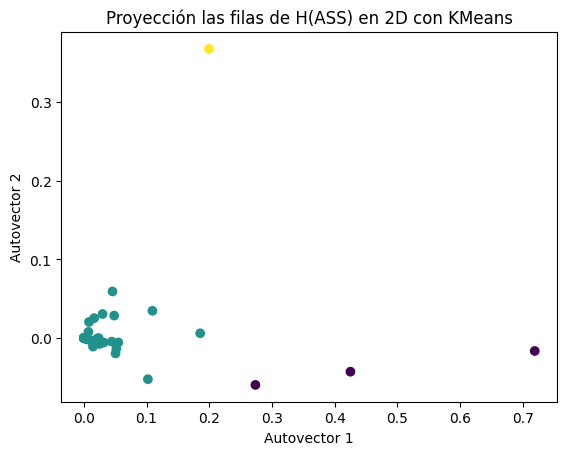

In [27]:

#usamos los autovectores encontrados
autovector1 = v1H
autovector2 = v2H


ceros =np.zeros((40,38))
#llamo V a la matriz que tiene como primeras columas a los autovectores y el resto 0
V = np.column_stack((matriz2cols, ceros))
# proyectamos ASS
proyeccion = H @ V
print (proyeccion)

# Aplicamos KMeans para agrupar los datos en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=4)
clusters = kmeans.fit_predict(proyeccion)

# Graficamos los resultados
scatter = plt.scatter(proyeccion[:, 0], proyeccion[:, 1], c=clusters)
plt.title("Proyección las filas de H(ASS) en 2D con KMeans")
plt.xlabel("Autovector 1")
plt.ylabel("Autovector 2")

plt.show()

In [28]:
#es muyyyyy parecido al de ASS normal... como analizo a q sectores pertenecen...

### CONSIGNA 11 CHAN


[[ 0.15635712  0.32552473  0.         ...  0.          0.
   0.        ]
 [ 0.00668869  0.01918734  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.11009061 -0.00172308  0.         ...  0.          0.
   0.        ]
 [ 0.28980504 -0.04036604  0.         ...  0.          0.
   0.        ]
 [ 0.56284503 -0.03407281  0.         ...  0.          0.
   0.        ]]


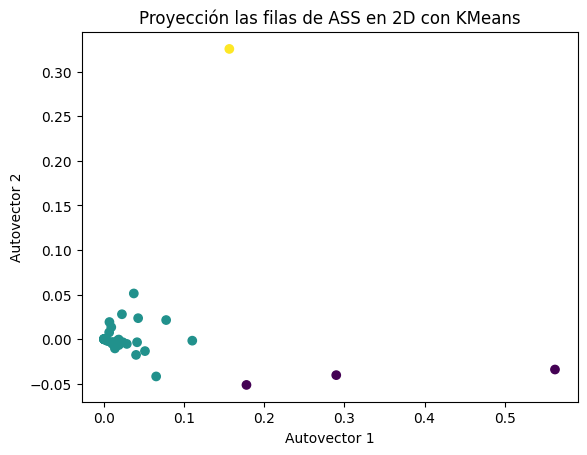

La distancia a 0 son: [3.61128648e-01 2.03197614e-02 0.00000000e+00 2.88969272e-02
 3.57325671e-02 6.32675499e-02 4.85872295e-02 1.61369428e-02
 1.19194203e-02 0.00000000e+00 4.13306030e-02 5.27800003e-02
 2.08362973e-03 9.85089852e-03 4.36679908e-02 1.59932062e-03
 5.16406385e-03 1.08790604e-02 8.26741671e-04 1.73555707e-02
 1.95712534e-02 1.70810220e-02 1.60477605e-03 1.27123882e-03
 1.83378006e-02 0.00000000e+00 3.68256066e-04 0.00000000e+00
 1.89634702e-04 1.69583380e-05 0.00000000e+00 0.00000000e+00
 1.13651844e-02 1.85011475e-01 2.37324538e-02 8.03793968e-02
 7.73083876e-02 1.10104097e-01 2.92602770e-01 5.63875416e-01]
La distancia max es 0.5638754158266746, de indice 39.
La distancia min es 0.0, de indice 2.


In [38]:
#calculemos las ditancia al origen de cada punto de ASS normal


#despues pongo todo esto mejor pero para calcularlo aca a la vsita
autovector1 = v1
autovector2 = v2

# los convertimos en una matriz de 2x40
matriz2cols = np.column_stack((autovector1, autovector2))

ceros =np.zeros((40,38))
#llamo V a la matriz que tiene como primeras columas a los autovectores y el resto 0
V = np.column_stack((matriz2cols, ceros))
# proyectamos ASS
proyeccion = ASS_arr @ V
print (proyeccion)



# Aplicamos KMeans para agrupar los datos en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=4)
clusters = kmeans.fit_predict(proyeccion)

# Graficamos los resultados
scatter = plt.scatter(proyeccion[:, 0], proyeccion[:, 1], c=clusters)
plt.title("Proyección las filas de ASS en 2D con KMeans")
plt.xlabel("Autovector 1")
plt.ylabel("Autovector 2")
plt.show()


distancias_0 = np.linalg.norm(proyeccion,axis=1)
print("La distancia a 0 son:", distancias_0)

indice_max = np.argmax(distancias_0)
indice_min = np.argmin(distancias_0)

print(f'La distancia max es {distancias_0[indice_max]}, de indice {indice_max}.')

print(f'La distancia min es {distancias_0[indice_min]}, de indice {indice_min}.')

#para identificar estos puntos nos tendriamos que sortear a las filas 39 y 2 de ASS, y ver a q insumos se reifeiren